# Weekly assignment 4: machine learning (1/2)

### Employee attrition dataset

Firstly importing the libraries which are essential for the assignment

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('employee_Attrition.csv')
df.dropna()
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
#Converting attrition to dummy variables so we can see it's correlation to other variables
df = pd.concat([df, pd.get_dummies(df['Attrition'])], axis=1)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,No,Yes
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,0,8,0,1,6,4,0,5,0,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,1,10,3,3,10,7,1,7,1,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,0,7,3,3,0,0,0,0,0,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,0,8,3,3,8,7,3,0,1,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,1,6,3,3,2,2,2,2,1,0


Using a correlation matrix to get an insight which variables are correlated to the variable attrition the most. These variables will be put to a new dataset and used in the further analysis.

In [7]:
df.corr()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,No,Yes
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,...,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089,0.159205,-0.159205
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,...,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363,0.056652,-0.056652
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,...,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406,-0.077924,0.077924
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,...,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065,0.031373,-0.031373
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197,0.010577,-0.010577
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999,0.103369,-0.103369
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123,0.006846,-0.006846
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976,0.130016,-0.130016
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281,0.169105,-0.169105


Since the correlation matrix is too big to see all the correlations- removing some completely unrelated variables from a dataset

In [8]:
df2 = df[["No", "Yes", "Attrition", "Age", "EnvironmentSatisfaction", "JobInvolvement", "TotalWorkingYears", "YearsAtCompany", "YearsInCurrentRole", "YearsWithCurrManager", "StockOptionLevel", "MonthlyIncome", "JobLevel"]]

## 2. Data cleaning

In [10]:
df3 = df[["Attrition", "Yes", "No", "Age", "JobLevel", "MonthlyIncome", "StockOptionLevel", "TotalWorkingYears", "YearsInCurrentRole", "YearsWithCurrManager"]]
df3.head()


,Attrition,Yes,No,Age,JobLevel,MonthlyIncome,StockOptionLevel,TotalWorkingYears,YearsInCurrentRole,YearsWithCurrManager
0,Yes,1,0,41,2,5993,0,8,4,5
1,No,0,1,49,2,5130,1,10,7,7
2,Yes,1,0,37,1,2090,0,7,0,0
3,No,0,1,33,1,2909,0,8,7,0
4,No,0,1,27,1,3468,1,6,2,2


In [11]:
df3['index1'] = df3.index
df3.head()

/var/folders/j6/p7qg0rss7hs27mn4tymt60xr0000gp/T/ipykernel_20298/1947034846.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['index1'] = df3.index


,Attrition,Yes,No,Age,JobLevel,MonthlyIncome,StockOptionLevel,TotalWorkingYears,YearsInCurrentRole,YearsWithCurrManager,index1
0,Yes,1,0,41,2,5993,0,8,4,5,0
1,No,0,1,49,2,5130,1,10,7,7,1
2,Yes,1,0,37,1,2090,0,7,0,0,2
3,No,0,1,33,1,2909,0,8,7,0,3
4,No,0,1,27,1,3468,1,6,2,2,4


## 3. Exploratory analysis

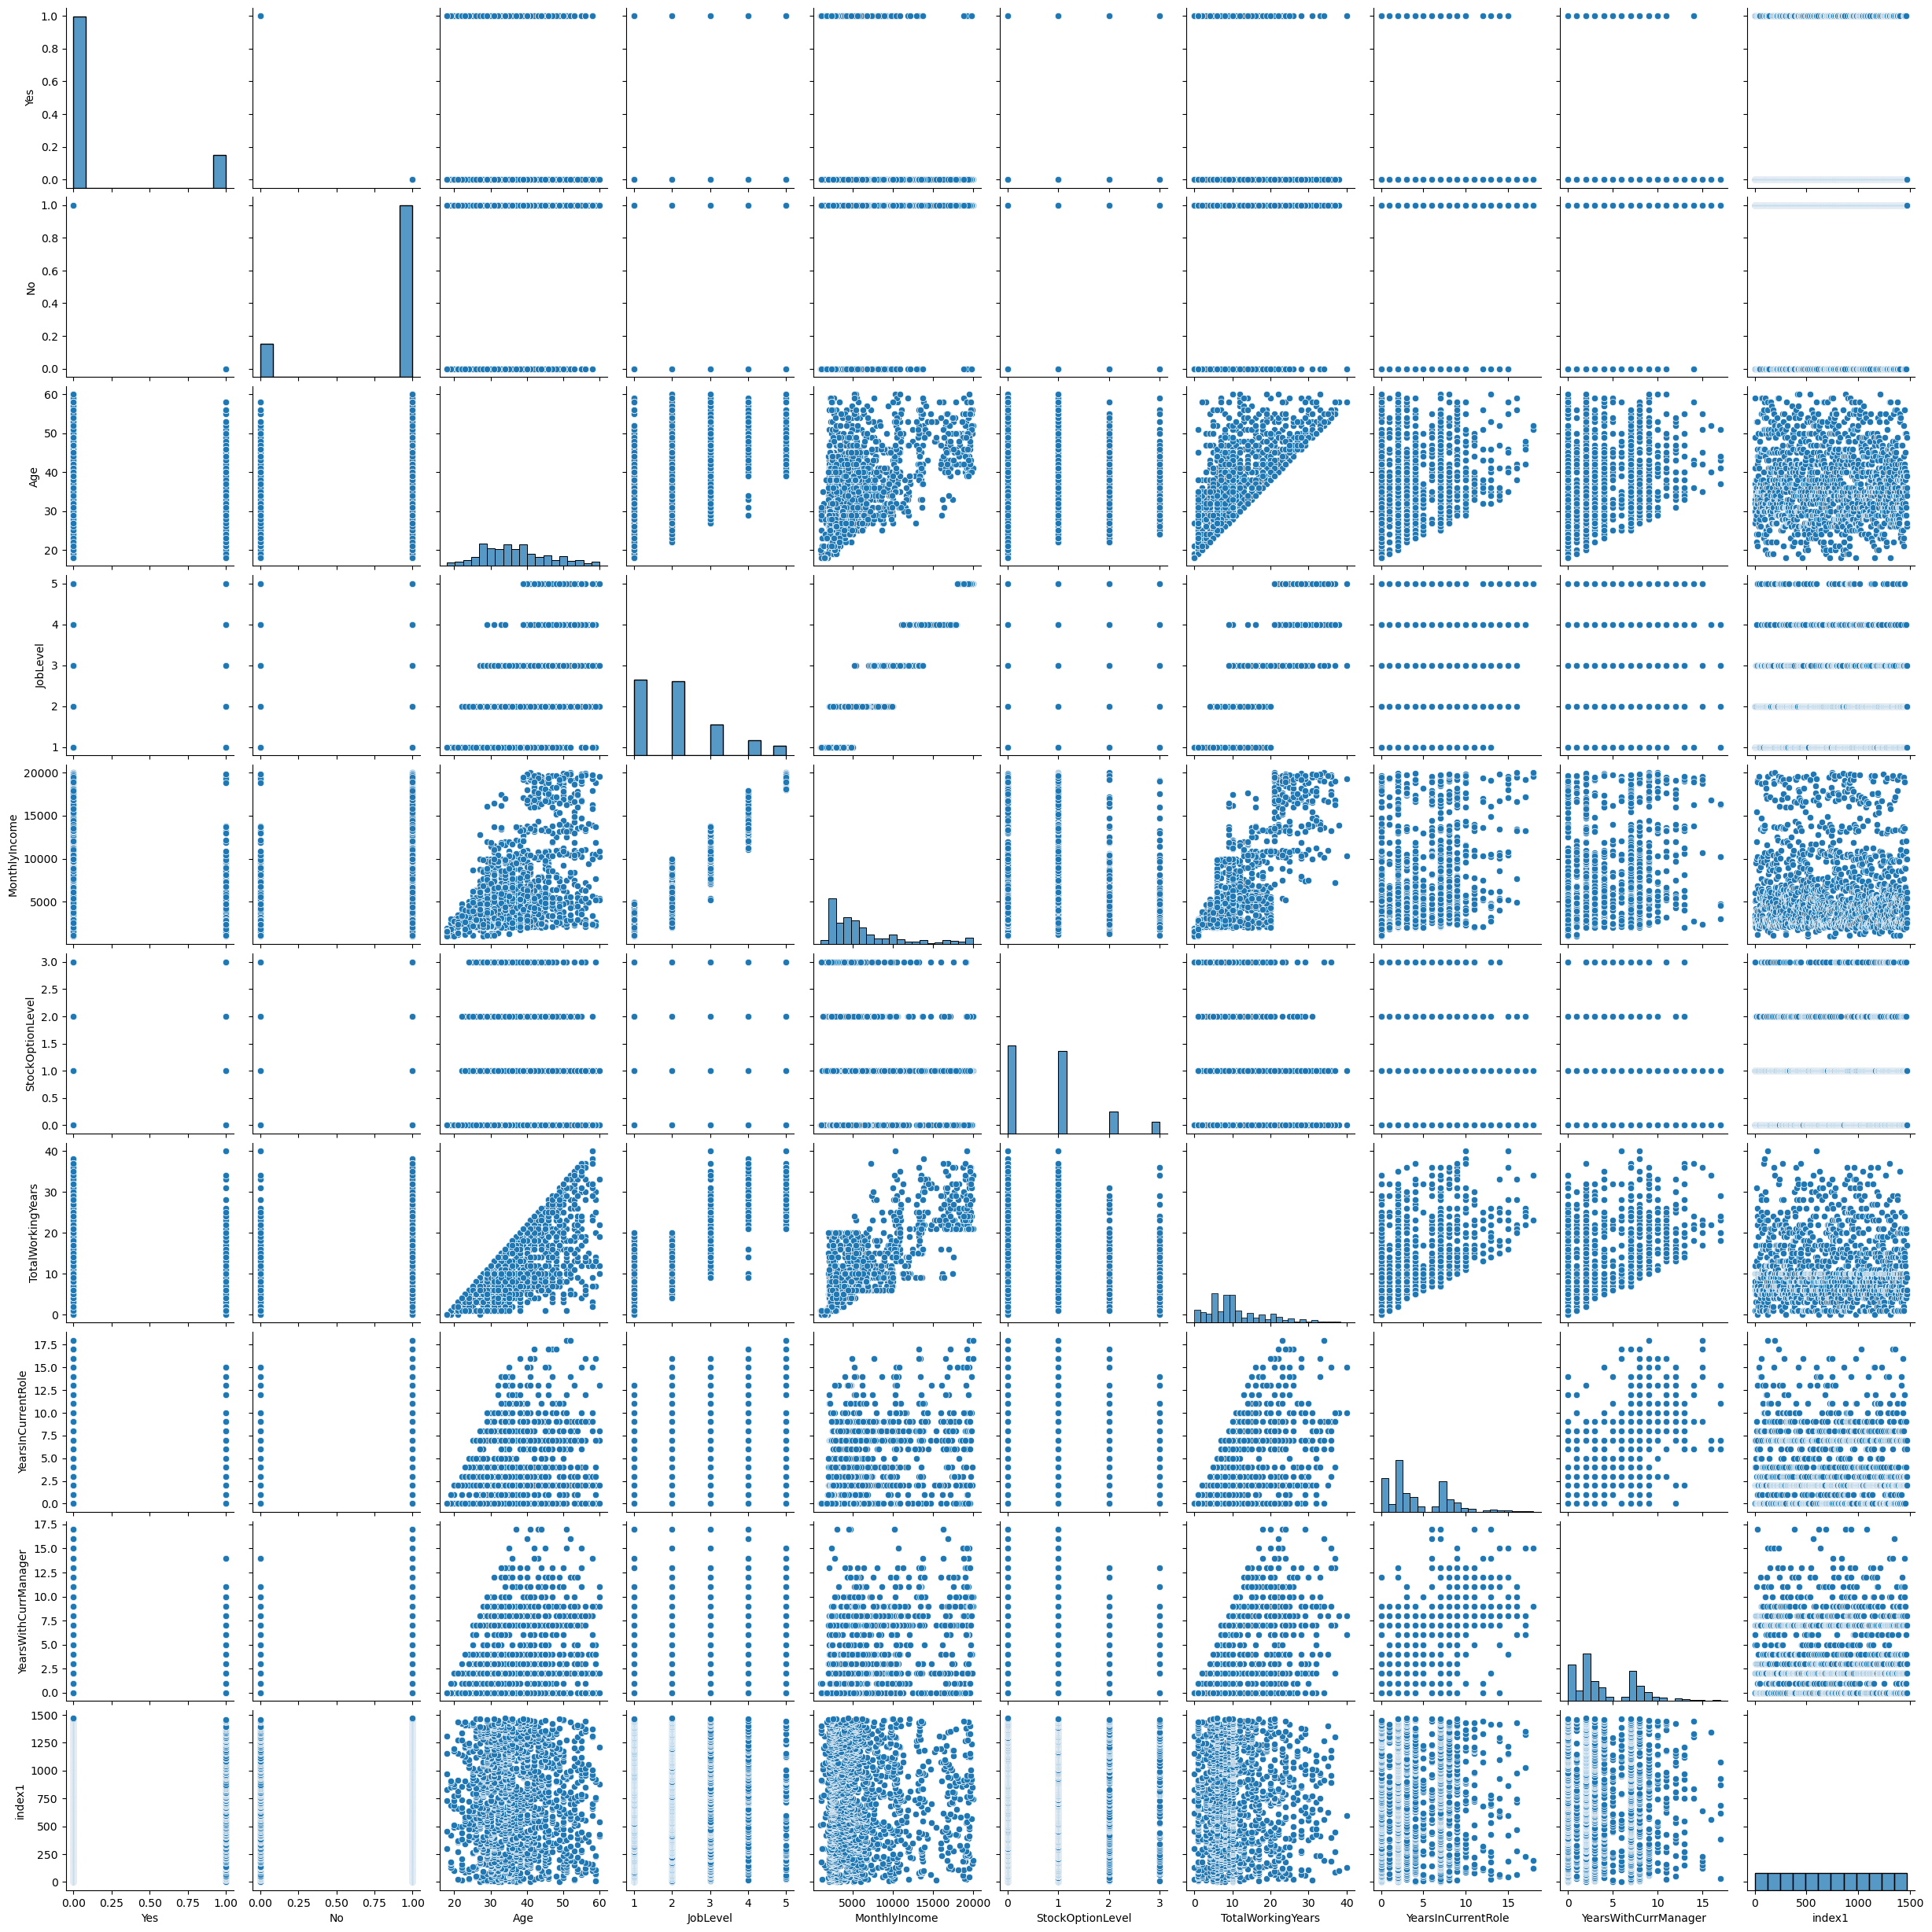

In [12]:
sns.pairplot(df3)
plt.show()

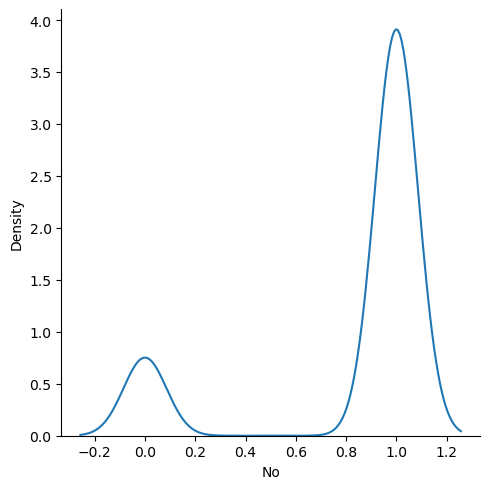

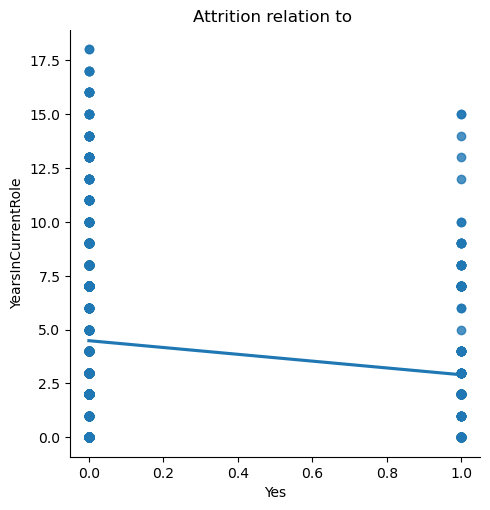

In [14]:
sns.lmplot(x='Yes', y='YearsInCurrentRole', data=df3, ci=False) #The last argument leaves out a so-called "confidence interval"
plt.title('Attrition relation to ')
plt.show()


# Weekly assignment 5: machine learning (2/2)


## Building the prediction model


In [15]:
X = df[['Age', 'JobLevel', 'MonthlyIncome', 'StockOptionLevel', 'TotalWorkingYears', 'YearsInCurrentRole', 'YearsWithCurrManager']] #create the X matrix

y = df['Yes'] #create the y-variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) #split the data, store it into different variables

X_train.head() #show the head of the training set

,Age,JobLevel,MonthlyIncome,StockOptionLevel,TotalWorkingYears,YearsInCurrentRole,YearsWithCurrManager
99,44,2,2042,1,17,2,2
785,40,3,10322,1,14,10,1
918,51,5,19847,1,31,10,10
1335,39,2,3902,3,7,2,2
1182,36,2,4374,0,4,2,2


In [16]:
from sklearn.neighbors import KNeighborsClassifier #the object class we need

knn = KNeighborsClassifier(n_neighbors=5) #create a KNN-classifier with 3 neighbors
knn = knn.fit(X_train, y_train) #this fits the k-nearest neigbor model with the train data

In [17]:
knn.n_samples_fit_

1029

In [18]:
knn.score(X_test, y_test) #calculate the fit on the *test* data

/Users/godajusaite/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.8095238095238095

Accuracy is 80%

In [19]:
from sklearn.metrics import confusion_matrix
y_test_pred = knn.predict(X_test) #the predicted values
cm = confusion_matrix(y_test, y_test_pred) #creates a "confusion matrix"
cm

/Users/godajusaite/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([[349,  15],
       [ 69,   8]])

In [20]:
knn.classes_

array([0, 1], dtype=uint8)

In [21]:
conf_matrix = pd.DataFrame(cm, index=['No attrition (actual)', 'Attrition apparent (actual)'], columns = ['No attrition (predicted)', 'Attrition apparent (predicted)']) #make a dataframe, put labels on rows (index) and columns 
conf_matrix

,No attrition (predicted),Attrition apparent (predicted)
No attrition (actual),349,15
Attrition apparent (actual),69,8


In [22]:
8/(15+8) #precision

0.34782608695652173

In [23]:
8/(69+8) # recall

0.1038961038961039

## Parameter setting


In [24]:
from sklearn.metrics import classification_report

for i in range(1,11):
    knn_new = KNeighborsClassifier(n_neighbors = i) #make a new kNN model with i (1-10) neighbors
    knn_new = knn_new.fit(X_train, y_train) #fit new model on train data
    y_test_pred_new = knn_new.predict(X_test) #predict using new model, with test data
    print(f"With {i} neighbors the result is:")
    print(classification_report(y_test, y_test_pred_new)) #use a built-in function to print out accuracy, precision and recall


With 1 neighbors the result is:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       364
           1       0.21      0.17      0.19        77

    accuracy                           0.74       441
   macro avg       0.52      0.52      0.52       441
weighted avg       0.72      0.74      0.73       441

With 2 neighbors the result is:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89       364
           1       0.27      0.08      0.12        77

    accuracy                           0.80       441
   macro avg       0.55      0.52      0.51       441
weighted avg       0.73      0.80      0.75       441

With 3 neighbors the result is:
              precision    recall  f1-score   support

           0       0.83      0.92      0.87       364
           1       0.27      0.14      0.19        77

    accuracy                           0.78       441
   macro avg       0.55      0.5

/Users/godajusaite/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/godajusaite/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will